In [11]:
import os
import glob
import importlib
import pandas as pd
import numpy as np
import pylab as pl

import analyze2p.arousal.dlc_utils as dlcutils
import analyze2p.arousal.parse_face_data as pf
import analyze2p.aggregate_datasets as aggr
import analyze2p.utils.helpers as hutils

In [12]:
%matplotlib notebook

In [3]:
eyetracker_dir = '/n/coxfs01/2p-data/eyetracker_tmp'

datakey = '20190617_JC097_fov1'
experiment='gratings'
session, animalid, fovnum = hutils.split_datakey_str(datakey)

traceid='traces001'
rootdir='/n/coxfs01/2p-data'
snapshot=391800

## load DLC results .hdf5

In [4]:
dlc_results_dir, dlc_video_dir = dlcutils.get_dlc_sources()

In [5]:
dlc_outfiles = sorted(glob.glob(os.path.join(dlc_results_dir, 
                    '%s_%s_f*_%i.h5' % (datakey, experiment, snapshot))), 
                      key=hutils.natural_keys)   

for d in dlc_outfiles:
    print(os.path.split(d)[-1])

20190617_JC097_fov1_gratings_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f2DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f3DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f4DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f4bDLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f4cDLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f5DLC_resnet50_facetrackingJan25shuffle1_391800.h5
20190617_JC097_fov1_gratings_f5bDLC_resnet50_facetrackingJan25shuffle1_391800.h5


In [6]:
dlc_outfile = dlc_outfiles[0]
print(dlc_outfile)

df = pd.read_hdf(dlc_outfile)
DLCscorer = df.columns.get_level_values(level=0).unique()[0]
tmpdf = df[DLCscorer].copy()
tmpdf.shape

/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/pose-analysis/20190617_JC097_fov1_gratings_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5


In [7]:
tmpdf.head()

scorer    DLC_resnet50_facetrackingJan25shuffle1_391800                        \
bodyparts                                          eyeT                         
coords                                                x          y likelihood   
0                                            378.436859  81.667633        1.0   
1                                            378.107849  81.304512        1.0   
2                                            379.332642  81.922653        1.0   
3                                            378.274261  81.750626        1.0   
4                                            378.435547  83.269806        1.0   

scorer                                                                \
bodyparts        eyeB                               eyeL               
coords              x           y likelihood           x           y   
0          369.577576  128.092712        1.0  341.079254  114.705055   
1          369.753845  129.883575        1.0  339.397736  115.957626   
2          369.931030  127.060867        1.0  342.290619  113.461014   
3          369.772980  128.664307        1.0  340.432190  115.649452   
4          369.482849  125.908928        1.0  341.110565  115.036125   

scorer                            ...                                     \
bodyparts                   eyeR  ...    snoutL2     snoutU1               
coords    likelihood           x  ... likelihood           x           y   
0                1.0  412.015839  ...        1.0  107.732162  156.669556   
1                1.0  412.536102  ...        1.0  100.518883  159.860611   
2                1.0  412.078094  ...        1.0   99.136108  161.200684   
3                1.0  412.083405  ...        1.0   97.674995  165.413345   
4                1.0  411.803650  ...        1.0   85.702057  173.220886   

scorer                                                              \
bodyparts               snoutU2                                paw   
coords    likelihood          x           y likelihood           x   
0                1.0  73.408394  179.491943        1.0  247.789230   
1                1.0  68.481331  183.329391        1.0  233.847595   
2                1.0  65.392967  186.816208        1.0  415.858643   
3                1.0  63.549068  192.259048        1.0  248.179626   
4                1.0  52.759151  202.337265        1.0  228.337418   

scorer                            
bodyparts                         
coords              y likelihood  
0          302.983582   0.001885  
1          299.891998   0.002672  
2          131.360504   0.000410  
3          301.938904   0.001445  
4          310.103210   0.003333  

[5 rows x 81 columns]

## Pupil center
Intersection pupilT-pupilB and pupilL-pupilR

In [25]:
# A = [tuple([x,y]) for x, y in tmpdf['pupilT'][['x', 'y']].values]
# B = [tuple([x,y]) for x, y in tmpdf['pupilB'][['x', 'y']].values]

# C = [tuple([x,y]) for x, y in tmpdf['pupilL'][['x', 'y']].values]
# D = [tuple([x,y]) for x, y in tmpdf['pupilR'][['x', 'y']].values]

# ctrs = [dlcutils.line_intersection((a, b), (c, d)) for a, b, c, d in zip(A, B, C, D)]


<IPython.core.display.Javascript object>


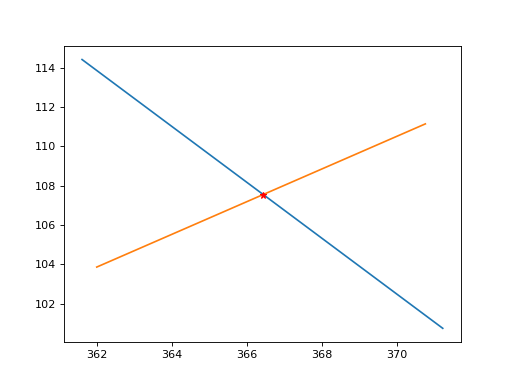

In [38]:
pl.figure()
pl.plot([A[0][0], B[0][0]], [A[0][1], B[0][1]]) # B[0][0])
pl.plot([C[0][0], D[0][0]], [C[0][1], D[0][1]]) # B[0][0])
pl.plot(ctrs[0][0], ctrs[0][1], 'r*')

In [91]:
importlib.reload(dlcutils)

<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [92]:
newdf = dlcutils.calculate_pupil_centers(df, DLCscorer=DLCscorer)
newdf.head()

,x,y,likelihood
0,366.436199,107.549595,1.0
1,366.139517,107.032310,1.0
2,367.588928,107.991501,1.0
3,366.960005,107.532403,1.0
4,367.668086,108.686412,1.0


In [93]:
# lowest_ix_levels = ['x', 'y']
# new_features = ['pupilC']
# new_labels = [[f]*len(lowest_ix_levels) for f in new_features]
# new_labels.append(np.tile(lowest_ix_levels, len(new_features)))
# new_ix = pd.MultiIndex.from_arrays(new_labels, names=('bodyparts', 'coords'))

# ctrs.columns = new_ix
# ctrs.head()
df = dlcutils.add_feature_to_df(tmpdf, newdf, new_features=['pupilC'])
df.head()

bodyparts        eyeT                              eyeB              \
coords              x          y likelihood           x           y   
0          378.436859  81.667633        1.0  369.577576  128.092712   
1          378.107849  81.304512        1.0  369.753845  129.883575   
2          379.332642  81.922653        1.0  369.931030  127.060867   
3          378.274261  81.750626        1.0  369.772980  128.664307   
4          378.435547  83.269806        1.0  369.482849  125.908928   

bodyparts                   eyeL                               eyeR  ...  \
coords    likelihood           x           y likelihood           x  ...   
0                1.0  341.079254  114.705055        1.0  412.015839  ...   
1                1.0  339.397736  115.957626        1.0  412.536102  ...   
2                1.0  342.290619  113.461014        1.0  412.078094  ...   
3                1.0  340.432190  115.649452        1.0  412.083405  ...   
4                1.0  341.110565  115.036125        1.0  411.803650  ...   

bodyparts    snoutU1    snoutU2                                paw  \
coords    likelihood          x           y likelihood           x   
0                1.0  73.408394  179.491943        1.0  247.789230   
1                1.0  68.481331  183.329391        1.0  233.847595   
2                1.0  65.392967  186.816208        1.0  415.858643   
3                1.0  63.549068  192.259048        1.0  248.179626   
4                1.0  52.759151  202.337265        1.0  228.337418   

bodyparts                             pupilC                         
coords              y likelihood           x           y likelihood  
0          302.983582   0.001885  366.436199  107.549595        1.0  
1          299.891998   0.002672  366.139517  107.032310        1.0  
2          131.360504   0.000410  367.588928  107.991501        1.0  
3          301.938904   0.001445  366.960005  107.532403        1.0  
4          310.103210   0.003333  367.668086  108.686412        1.0  

[5 rows x 84 columns]

In [94]:
df.head()

bodyparts        eyeT                              eyeB              \
coords              x          y likelihood           x           y   
0          378.436859  81.667633        1.0  369.577576  128.092712   
1          378.107849  81.304512        1.0  369.753845  129.883575   
2          379.332642  81.922653        1.0  369.931030  127.060867   
3          378.274261  81.750626        1.0  369.772980  128.664307   
4          378.435547  83.269806        1.0  369.482849  125.908928   

bodyparts                   eyeL                               eyeR  ...  \
coords    likelihood           x           y likelihood           x  ...   
0                1.0  341.079254  114.705055        1.0  412.015839  ...   
1                1.0  339.397736  115.957626        1.0  412.536102  ...   
2                1.0  342.290619  113.461014        1.0  412.078094  ...   
3                1.0  340.432190  115.649452        1.0  412.083405  ...   
4                1.0  341.110565  115.036125        1.0  411.803650  ...   

bodyparts    snoutU1    snoutU2                                paw  \
coords    likelihood          x           y likelihood           x   
0                1.0  73.408394  179.491943        1.0  247.789230   
1                1.0  68.481331  183.329391        1.0  233.847595   
2                1.0  65.392967  186.816208        1.0  415.858643   
3                1.0  63.549068  192.259048        1.0  248.179626   
4                1.0  52.759151  202.337265        1.0  228.337418   

bodyparts                             pupilC                         
coords              y likelihood           x           y likelihood  
0          302.983582   0.001885  366.436199  107.549595        1.0  
1          299.891998   0.002672  366.139517  107.032310        1.0  
2          131.360504   0.000410  367.588928  107.991501        1.0  
3          301.938904   0.001445  366.960005  107.532403        1.0  
4          310.103210   0.003333  367.668086  108.686412        1.0  

[5 rows x 84 columns]

<IPython.core.display.Javascript object>


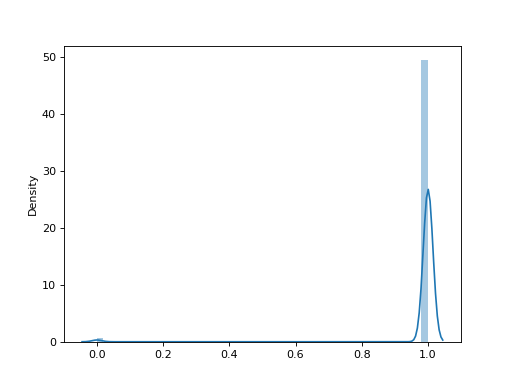

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [83]:
# feature_list = ['pupilT', 'pupilB', 'pupilL', 'pupilR']
# calc_cols = [(x, 'likelihood') for x in feature_list]
# min_likelihoods = tmpdf[calc_cols].min(axis=1)

# pl.figure()
# sns.distplot(min_likelihoods)

## Relative position (from 1st)

In [114]:
dists = [np.linalg.norm(c1-c2) for c1, c2 in zip(df['pupilC'][['x', 'y']].values,
                                        df['pupilC'][['x', 'y']].shift().values)]
dists[-5:]

[0.048741271335787796,
 0.017778308366565743,
 0.1365418122908158,
 0.06536887987974908,
 0.027997201806790353]

In [115]:
df['pupilC'].tail()

coords,x,y,likelihood
21501,370.164556,105.207801,1.0
21502,370.180278,105.216102,1.0
21503,370.233678,105.341768,1.0
21504,370.249907,105.278446,1.0
21505,370.222535,105.284330,1.0


In [63]:
import seaborn as sns

<IPython.core.display.Javascript object>


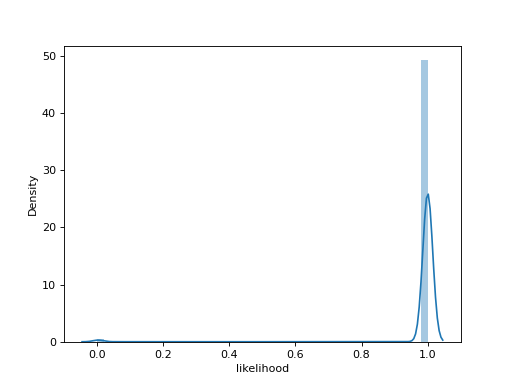

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='likelihood', ylabel='Density'>

In [68]:
pl.figure()
sns.distplot(tmpdf['whiskerAL3']['likelihood'])


In [128]:
importlib.reload(dlcutils)

<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [129]:
dlc_outfile

'/n/coxfs01/julianarhee/face-tracking/facetracking-jyr-2020-01-25/pose-analysis/20190617_JC097_fov1_gratings_f1DLC_resnet50_facetrackingJan25shuffle1_391800.h5'

In [130]:
df1 = dlcutils.calculate_pupil_metrics(dlc_outfile)


In [131]:
df1.head()

,pupil_maj,pupil_min,pupil_area,cr_dist,pupil_dist
0,16.732791,11.402160,599.384346,31.901240,NaN
1,16.943393,11.726294,624.181734,32.440590,0.596325
2,17.633988,12.165485,673.953340,31.109435,1.738056
3,16.506024,10.945150,567.562995,31.684656,0.778662
4,16.294964,11.661032,596.953164,30.832489,1.353927


In [134]:
# Calculate fraction pupil area
pupil_max = df1['pupil_area'].max()
df1['pupil_fraction'] = df1['pupil_area']/pupil_max

In [149]:
# Get snout area
df2 = dlcutils.calculate_snout_metrics(dlc_outfile)

In [157]:
# Combine pupil + snout
df_ = pd.concat([df1, df2], axis=1)

<IPython.core.display.Javascript object>


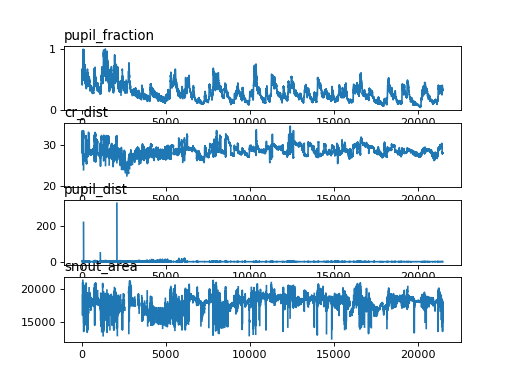

In [163]:
feat_list = ['pupil_fraction', 'cr_dist', 'pupil_dist', 'snout_area']

fig, axn = pl.subplots(len(feat_list), 1)
for ax, feat in zip(axn.flat, feat_list):
    ax.plot(df_[feat])
    ax.set_title(feat, loc='left')

<IPython.core.display.Javascript object>


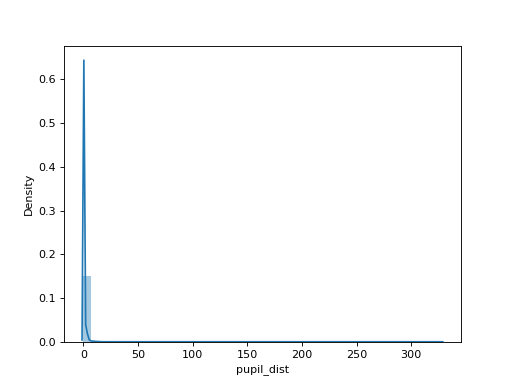

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pupil_dist', ylabel='Density'>

In [137]:
pl.figure()
sns.distplot(df1['pupil_dist'])

In [138]:
df1['pupil_dist'].describe()

count    21122.000000
mean         0.571008
std          3.004984
min          0.000609
25%          0.056781
50%          0.132505
75%          0.409821
max        327.611589
Name: pupil_dist, dtype: float64

In [143]:
df1[df1['pupil_dist']>20]


,pupil_maj,pupil_min,pupil_area,cr_dist,pupil_dist,pupil_fraction
90,18.205740,14.456936,826.864708,23.960566,220.395121,0.694879
1090,12.002458,9.415915,355.044346,26.878233,49.406442,0.298372
2078,15.938122,13.024779,652.164838,25.720224,327.611589,0.548065


<IPython.core.display.Javascript object>


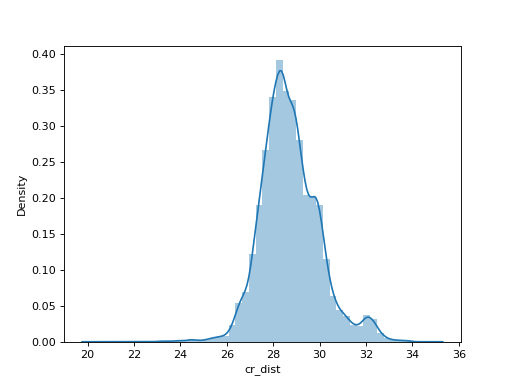

/n/coxfs01/2p-pipeline/envs/rat2p/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cr_dist', ylabel='Density'>

In [144]:
pl.figure()
sns.distplot(df1['cr_dist'])

In [148]:
importlib.reload(dlcutils)

<module 'analyze2p.arousal.dlc_utils' from '/net/coxfs01/srv/export/coxfs01/share_root/2p-pipeline/repos/rat-2p-area-characterizations/analyze2p/arousal/dlc_utils.py'>

In [158]:
df_.shape

(21506, 7)

In [159]:
df_.head()

,pupil_maj,pupil_min,pupil_area,cr_dist,pupil_dist,pupil_fraction,snout_area
0,16.732791,11.402160,599.384346,31.901240,NaN,0.503710,NaN
1,16.943393,11.726294,624.181734,32.440590,0.596325,0.524549,NaN
2,17.633988,12.165485,673.953340,31.109435,1.738056,0.566376,NaN
3,16.506024,10.945150,567.562995,31.684656,0.778662,0.476968,20385.272993
4,16.294964,11.661032,596.953164,30.832489,1.353927,0.501667,NaN


In [160]:
df_.dropna().shape

(16752, 7)

In [161]:
16752/21506.

0.7789454105830931

In [162]:
df_.head()

,pupil_maj,pupil_min,pupil_area,cr_dist,pupil_dist,pupil_fraction,snout_area
0,16.732791,11.402160,599.384346,31.901240,NaN,0.503710,NaN
1,16.943393,11.726294,624.181734,32.440590,0.596325,0.524549,NaN
2,17.633988,12.165485,673.953340,31.109435,1.738056,0.566376,NaN
3,16.506024,10.945150,567.562995,31.684656,0.778662,0.476968,20385.272993
4,16.294964,11.661032,596.953164,30.832489,1.353927,0.501667,NaN


In [ ]:
pl.figure()
for f